# Modelling

In [1]:
import numpy as np

data = np.load("colposcopy_lstm_data.npz")

X_train_lstm = data["X_train_lstm"]
y_train      = data["y_train"]        
y_train_enc  = data["y_train_enc"]
X_test_lstm  = data["X_test_lstm"]
y_test       = data["y_test"]
y_test_enc   = data["y_test_enc"]

print("y_train shape:", y_train.shape)
print("unique labels:", np.unique(y_train))

y_train shape: (99,)
unique labels: ['0' '1' '2' '3' '4' '5']


## Balancing Data

In [2]:
from sklearn.utils.class_weight import compute_class_weight

y_train = y_train.astype(int)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.arange(6),   
    y=y_train
)

class_weight_dict = {i: w for i, w in enumerate(class_weights)}

print("Class Weights:")
for k, v in class_weight_dict.items():
    print(f"Class {k} : {v:.4f}")

Class Weights:
Class 0 : 2.3571
Class 1 : 1.3750
Class 2 : 1.6500
Class 3 : 0.6875
Class 4 : 0.9167
Class 5 : 0.5893


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    LSTM(
        units=64,
        input_shape=(180, 1),
        return_sequences=False
    ),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.3),

    Dense(6, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()



Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 lstm (LSTM)                 (None, 64)                16896     


 dropout (Dropout)           (None, 64)                0         


 dense (Dense)               (None, 32)                2080      


 dropout_1 (Dropout)         (None, 32)                0         


 dense_1 (Dense)             (None, 6)                 198       


Total params: 19,174


Trainable params: 19,174


Non-trainable params: 0


_________________________________________________________________


## Trainning

In [4]:
history = model.fit(
    X_train_lstm,
    y_train_enc,
    epochs=50,
    batch_size=16,
    validation_split=0.2,  
    class_weight=class_weight_dict,
    verbose=1
)


Epoch 1/50


1/5 [=====>........................] - ETA: 8s - loss: 1.7018 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 1.8648 - accuracy: 0.1562

3/5 [=================>............] - ETA: 0s - loss: 1.9675 - accuracy: 0.1875

4/5 [=======================>......] - ETA: 0s - loss: 1.9736 - accuracy: 0.2031

5/5 [==============================] - ETA: 0s - loss: 1.9775 - accuracy: 0.1899

5/5 [==============================] - 3s 181ms/step - loss: 1.9775 - accuracy: 0.1899 - val_loss: 1.8091 - val_accuracy: 0.0000e+00


Epoch 2/50


1/5 [=====>........................] - ETA: 0s - loss: 2.6917 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 2.2756 - accuracy: 0.1875

3/5 [=================>............] - ETA: 0s - loss: 2.1044 - accuracy: 0.1667

4/5 [=======================>......] - ETA: 0s - loss: 2.0855 - accuracy: 0.1719

5/5 [==============================] - ETA: 0s - loss: 1.9759 - accuracy: 0.1899

5/5 [==============================] - 0s 79ms/step - loss: 1.9759 - accuracy: 0.1899 - val_loss: 1.8471 - val_accuracy: 0.0000e+00


Epoch 3/50


1/5 [=====>........................] - ETA: 0s - loss: 2.0405 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 2.0319 - accuracy: 0.1875

3/5 [=================>............] - ETA: 0s - loss: 2.0134 - accuracy: 0.1667

4/5 [=======================>......] - ETA: 0s - loss: 1.9895 - accuracy: 0.2188

5/5 [==============================] - ETA: 0s - loss: 1.9705 - accuracy: 0.2278

5/5 [==============================] - 0s 72ms/step - loss: 1.9705 - accuracy: 0.2278 - val_loss: 1.8897 - val_accuracy: 0.0000e+00


Epoch 4/50


1/5 [=====>........................] - ETA: 0s - loss: 1.7806 - accuracy: 0.3750

2/5 [===========>..................] - ETA: 0s - loss: 2.0093 - accuracy: 0.3125

3/5 [=================>............] - ETA: 0s - loss: 2.0021 - accuracy: 0.2500

4/5 [=======================>......] - ETA: 0s - loss: 1.9927 - accuracy: 0.2812

5/5 [==============================] - ETA: 0s - loss: 1.9616 - accuracy: 0.2658

5/5 [==============================] - 0s 84ms/step - loss: 1.9616 - accuracy: 0.2658 - val_loss: 1.9295 - val_accuracy: 0.0000e+00


Epoch 5/50


1/5 [=====>........................] - ETA: 0s - loss: 2.0316 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 1.7774 - accuracy: 0.2812

3/5 [=================>............] - ETA: 0s - loss: 1.8802 - accuracy: 0.2708

4/5 [=======================>......] - ETA: 0s - loss: 1.9515 - accuracy: 0.2500

5/5 [==============================] - ETA: 0s - loss: 1.9520 - accuracy: 0.2658

5/5 [==============================] - 0s 72ms/step - loss: 1.9520 - accuracy: 0.2658 - val_loss: 1.9708 - val_accuracy: 0.0000e+00


Epoch 6/50


1/5 [=====>........................] - ETA: 0s - loss: 1.7419 - accuracy: 0.2500

2/5 [===========>..................] - ETA: 0s - loss: 2.0039 - accuracy: 0.2812

3/5 [=================>............] - ETA: 0s - loss: 2.0534 - accuracy: 0.2292

4/5 [=======================>......] - ETA: 0s - loss: 1.9690 - accuracy: 0.2812

5/5 [==============================] - ETA: 0s - loss: 1.9568 - accuracy: 0.2785

5/5 [==============================] - 0s 71ms/step - loss: 1.9568 - accuracy: 0.2785 - val_loss: 2.0092 - val_accuracy: 0.0000e+00


Epoch 7/50


1/5 [=====>........................] - ETA: 0s - loss: 2.0759 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 1.9776 - accuracy: 0.2812

3/5 [=================>............] - ETA: 0s - loss: 2.0590 - accuracy: 0.2083

4/5 [=======================>......] - ETA: 0s - loss: 2.0163 - accuracy: 0.2188

5/5 [==============================] - ETA: 0s - loss: 1.9620 - accuracy: 0.2278

5/5 [==============================] - 0s 72ms/step - loss: 1.9620 - accuracy: 0.2278 - val_loss: 2.0562 - val_accuracy: 0.0000e+00


Epoch 8/50


1/5 [=====>........................] - ETA: 0s - loss: 2.1694 - accuracy: 0.2500

2/5 [===========>..................] - ETA: 0s - loss: 1.9668 - accuracy: 0.2188

3/5 [=================>............] - ETA: 0s - loss: 2.0408 - accuracy: 0.2083

4/5 [=======================>......] - ETA: 0s - loss: 1.9786 - accuracy: 0.2344

5/5 [==============================] - ETA: 0s - loss: 1.9595 - accuracy: 0.2278

5/5 [==============================] - 0s 72ms/step - loss: 1.9595 - accuracy: 0.2278 - val_loss: 2.0865 - val_accuracy: 0.0000e+00


Epoch 9/50


1/5 [=====>........................] - ETA: 0s - loss: 1.8034 - accuracy: 0.2500

2/5 [===========>..................] - ETA: 0s - loss: 1.6838 - accuracy: 0.2188

3/5 [=================>............] - ETA: 0s - loss: 1.8573 - accuracy: 0.2292

4/5 [=======================>......] - ETA: 0s - loss: 1.8822 - accuracy: 0.2500

5/5 [==============================] - ETA: 0s - loss: 1.9464 - accuracy: 0.2405

5/5 [==============================] - 0s 74ms/step - loss: 1.9464 - accuracy: 0.2405 - val_loss: 2.1227 - val_accuracy: 0.0000e+00


Epoch 10/50


1/5 [=====>........................] - ETA: 0s - loss: 1.5556 - accuracy: 0.3125

2/5 [===========>..................] - ETA: 0s - loss: 1.8205 - accuracy: 0.2812

3/5 [=================>............] - ETA: 0s - loss: 1.9101 - accuracy: 0.2917

4/5 [=======================>......] - ETA: 0s - loss: 1.8603 - accuracy: 0.2969

5/5 [==============================] - ETA: 0s - loss: 1.9398 - accuracy: 0.2658

5/5 [==============================] - 0s 74ms/step - loss: 1.9398 - accuracy: 0.2658 - val_loss: 2.1703 - val_accuracy: 0.0000e+00


Epoch 11/50


1/5 [=====>........................] - ETA: 0s - loss: 2.2147 - accuracy: 0.0625

2/5 [===========>..................] - ETA: 0s - loss: 2.1082 - accuracy: 0.1250

3/5 [=================>............] - ETA: 0s - loss: 2.0415 - accuracy: 0.2083

4/5 [=======================>......] - ETA: 0s - loss: 2.0343 - accuracy: 0.1562

5/5 [==============================] - ETA: 0s - loss: 1.9646 - accuracy: 0.1519

5/5 [==============================] - 0s 76ms/step - loss: 1.9646 - accuracy: 0.1519 - val_loss: 2.1963 - val_accuracy: 0.0000e+00


Epoch 12/50


1/5 [=====>........................] - ETA: 0s - loss: 1.8677 - accuracy: 0.3750

2/5 [===========>..................] - ETA: 0s - loss: 1.9482 - accuracy: 0.2812

3/5 [=================>............] - ETA: 0s - loss: 2.0790 - accuracy: 0.2500

4/5 [=======================>......] - ETA: 0s - loss: 1.9549 - accuracy: 0.2656

5/5 [==============================] - ETA: 0s - loss: 1.9436 - accuracy: 0.2405

5/5 [==============================] - 0s 72ms/step - loss: 1.9436 - accuracy: 0.2405 - val_loss: 2.2018 - val_accuracy: 0.0000e+00


Epoch 13/50


1/5 [=====>........................] - ETA: 0s - loss: 1.8650 - accuracy: 0.2500

2/5 [===========>..................] - ETA: 0s - loss: 1.8549 - accuracy: 0.2188

3/5 [=================>............] - ETA: 0s - loss: 1.8116 - accuracy: 0.2500

4/5 [=======================>......] - ETA: 0s - loss: 1.9099 - accuracy: 0.2344

5/5 [==============================] - ETA: 0s - loss: 1.9249 - accuracy: 0.2152

5/5 [==============================] - 0s 71ms/step - loss: 1.9249 - accuracy: 0.2152 - val_loss: 2.2503 - val_accuracy: 0.0000e+00


Epoch 14/50


1/5 [=====>........................] - ETA: 0s - loss: 2.0448 - accuracy: 0.2500

2/5 [===========>..................] - ETA: 0s - loss: 1.9250 - accuracy: 0.2500

3/5 [=================>............] - ETA: 0s - loss: 1.8552 - accuracy: 0.2292

4/5 [=======================>......] - ETA: 0s - loss: 1.8715 - accuracy: 0.2031

5/5 [==============================] - ETA: 0s - loss: 1.9165 - accuracy: 0.2025

5/5 [==============================] - 0s 73ms/step - loss: 1.9165 - accuracy: 0.2025 - val_loss: 2.3457 - val_accuracy: 0.0000e+00


Epoch 15/50


1/5 [=====>........................] - ETA: 0s - loss: 1.9275 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 1.9762 - accuracy: 0.2188

3/5 [=================>............] - ETA: 0s - loss: 2.0565 - accuracy: 0.1458

4/5 [=======================>......] - ETA: 0s - loss: 2.0027 - accuracy: 0.1875

5/5 [==============================] - ETA: 0s - loss: 1.9517 - accuracy: 0.2152

5/5 [==============================] - 0s 75ms/step - loss: 1.9517 - accuracy: 0.2152 - val_loss: 2.3549 - val_accuracy: 0.0000e+00


Epoch 16/50


1/5 [=====>........................] - ETA: 0s - loss: 1.8002 - accuracy: 0.1250

2/5 [===========>..................] - ETA: 0s - loss: 1.9601 - accuracy: 0.1562

3/5 [=================>............] - ETA: 0s - loss: 1.9601 - accuracy: 0.2083

4/5 [=======================>......] - ETA: 0s - loss: 1.9507 - accuracy: 0.2500

5/5 [==============================] - ETA: 0s - loss: 1.9302 - accuracy: 0.2278

5/5 [==============================] - 0s 75ms/step - loss: 1.9302 - accuracy: 0.2278 - val_loss: 2.3805 - val_accuracy: 0.0000e+00


Epoch 17/50


1/5 [=====>........................] - ETA: 0s - loss: 1.8853 - accuracy: 0.1250

2/5 [===========>..................] - ETA: 0s - loss: 2.1390 - accuracy: 0.1250

3/5 [=================>............] - ETA: 0s - loss: 1.9775 - accuracy: 0.1250

4/5 [=======================>......] - ETA: 0s - loss: 1.9574 - accuracy: 0.1094

5/5 [==============================] - ETA: 0s - loss: 1.9085 - accuracy: 0.1772

5/5 [==============================] - 0s 73ms/step - loss: 1.9085 - accuracy: 0.1772 - val_loss: 2.4092 - val_accuracy: 0.0000e+00


Epoch 18/50


1/5 [=====>........................] - ETA: 0s - loss: 1.6699 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 1.7842 - accuracy: 0.2500

3/5 [=================>............] - ETA: 0s - loss: 1.8170 - accuracy: 0.2292

4/5 [=======================>......] - ETA: 0s - loss: 1.8944 - accuracy: 0.2344

5/5 [==============================] - ETA: 0s - loss: 1.9259 - accuracy: 0.2025

5/5 [==============================] - 0s 76ms/step - loss: 1.9259 - accuracy: 0.2025 - val_loss: 2.4958 - val_accuracy: 0.0000e+00


Epoch 19/50


1/5 [=====>........................] - ETA: 0s - loss: 1.6488 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 1.8434 - accuracy: 0.2188

3/5 [=================>............] - ETA: 0s - loss: 1.9088 - accuracy: 0.2083

4/5 [=======================>......] - ETA: 0s - loss: 1.9237 - accuracy: 0.1875

5/5 [==============================] - ETA: 0s - loss: 1.9375 - accuracy: 0.2152

5/5 [==============================] - 0s 75ms/step - loss: 1.9375 - accuracy: 0.2152 - val_loss: 2.4977 - val_accuracy: 0.0000e+00


Epoch 20/50


1/5 [=====>........................] - ETA: 0s - loss: 2.1542 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 2.1201 - accuracy: 0.2188

3/5 [=================>............] - ETA: 0s - loss: 2.0605 - accuracy: 0.2500

4/5 [=======================>......] - ETA: 0s - loss: 1.9647 - accuracy: 0.2656

5/5 [==============================] - ETA: 0s - loss: 1.9390 - accuracy: 0.2785

5/5 [==============================] - 0s 78ms/step - loss: 1.9390 - accuracy: 0.2785 - val_loss: 2.4061 - val_accuracy: 0.0000e+00


Epoch 21/50


1/5 [=====>........................] - ETA: 0s - loss: 1.8606 - accuracy: 0.1250

2/5 [===========>..................] - ETA: 0s - loss: 1.8917 - accuracy: 0.1562

3/5 [=================>............] - ETA: 0s - loss: 1.9788 - accuracy: 0.1458

4/5 [=======================>......] - ETA: 0s - loss: 1.9695 - accuracy: 0.1875

5/5 [==============================] - ETA: 0s - loss: 1.9463 - accuracy: 0.2025

5/5 [==============================] - 0s 74ms/step - loss: 1.9463 - accuracy: 0.2025 - val_loss: 2.3579 - val_accuracy: 0.0000e+00


Epoch 22/50


1/5 [=====>........................] - ETA: 0s - loss: 1.7925 - accuracy: 0.3125

2/5 [===========>..................] - ETA: 0s - loss: 1.9282 - accuracy: 0.2812

3/5 [=================>............] - ETA: 0s - loss: 1.8829 - accuracy: 0.3125

4/5 [=======================>......] - ETA: 0s - loss: 1.9245 - accuracy: 0.3125

5/5 [==============================] - ETA: 0s - loss: 1.9200 - accuracy: 0.3418

5/5 [==============================] - 0s 74ms/step - loss: 1.9200 - accuracy: 0.3418 - val_loss: 2.3518 - val_accuracy: 0.0000e+00


Epoch 23/50


1/5 [=====>........................] - ETA: 0s - loss: 2.0452 - accuracy: 0.3125

2/5 [===========>..................] - ETA: 0s - loss: 1.8184 - accuracy: 0.2812

3/5 [=================>............] - ETA: 0s - loss: 1.8751 - accuracy: 0.3125

4/5 [=======================>......] - ETA: 0s - loss: 1.8546 - accuracy: 0.3438

5/5 [==============================] - ETA: 0s - loss: 1.8998 - accuracy: 0.3165

5/5 [==============================] - 0s 76ms/step - loss: 1.8998 - accuracy: 0.3165 - val_loss: 2.3829 - val_accuracy: 0.0000e+00


Epoch 24/50


1/5 [=====>........................] - ETA: 0s - loss: 1.8920 - accuracy: 0.2500

2/5 [===========>..................] - ETA: 0s - loss: 1.9567 - accuracy: 0.2500

3/5 [=================>............] - ETA: 0s - loss: 1.9256 - accuracy: 0.2292

4/5 [=======================>......] - ETA: 0s - loss: 1.8856 - accuracy: 0.2969

5/5 [==============================] - ETA: 0s - loss: 1.8816 - accuracy: 0.2532

5/5 [==============================] - 0s 75ms/step - loss: 1.8816 - accuracy: 0.2532 - val_loss: 2.4395 - val_accuracy: 0.0000e+00


Epoch 25/50


1/5 [=====>........................] - ETA: 0s - loss: 2.0714 - accuracy: 0.3125

2/5 [===========>..................] - ETA: 0s - loss: 1.9453 - accuracy: 0.3750

3/5 [=================>............] - ETA: 0s - loss: 2.0146 - accuracy: 0.3125

4/5 [=======================>......] - ETA: 0s - loss: 2.0423 - accuracy: 0.2969

5/5 [==============================] - ETA: 0s - loss: 1.9364 - accuracy: 0.2785

5/5 [==============================] - 0s 71ms/step - loss: 1.9364 - accuracy: 0.2785 - val_loss: 2.4736 - val_accuracy: 0.0000e+00


Epoch 26/50


1/5 [=====>........................] - ETA: 0s - loss: 1.7595 - accuracy: 0.1250

2/5 [===========>..................] - ETA: 0s - loss: 1.9290 - accuracy: 0.1875

3/5 [=================>............] - ETA: 0s - loss: 1.9252 - accuracy: 0.1875

4/5 [=======================>......] - ETA: 0s - loss: 1.8892 - accuracy: 0.1719

5/5 [==============================] - ETA: 0s - loss: 1.9107 - accuracy: 0.2025

5/5 [==============================] - 0s 75ms/step - loss: 1.9107 - accuracy: 0.2025 - val_loss: 2.4786 - val_accuracy: 0.0000e+00


Epoch 27/50


1/5 [=====>........................] - ETA: 0s - loss: 1.5608 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 1.7437 - accuracy: 0.3125

3/5 [=================>............] - ETA: 0s - loss: 1.8547 - accuracy: 0.2500

4/5 [=======================>......] - ETA: 0s - loss: 1.9193 - accuracy: 0.2344

5/5 [==============================] - ETA: 0s - loss: 1.8963 - accuracy: 0.2278

5/5 [==============================] - 0s 70ms/step - loss: 1.8963 - accuracy: 0.2278 - val_loss: 2.4825 - val_accuracy: 0.0000e+00


Epoch 28/50


1/5 [=====>........................] - ETA: 0s - loss: 1.3580 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 1.6430 - accuracy: 0.2188

3/5 [=================>............] - ETA: 0s - loss: 1.8673 - accuracy: 0.2708

4/5 [=======================>......] - ETA: 0s - loss: 1.8996 - accuracy: 0.2344

5/5 [==============================] - ETA: 0s - loss: 1.8863 - accuracy: 0.2785

5/5 [==============================] - 0s 76ms/step - loss: 1.8863 - accuracy: 0.2785 - val_loss: 2.4992 - val_accuracy: 0.0000e+00


Epoch 29/50


1/5 [=====>........................] - ETA: 0s - loss: 1.6658 - accuracy: 0.4375

2/5 [===========>..................] - ETA: 0s - loss: 1.8680 - accuracy: 0.3438

3/5 [=================>............] - ETA: 0s - loss: 1.9109 - accuracy: 0.3333

4/5 [=======================>......] - ETA: 0s - loss: 1.8577 - accuracy: 0.3125

5/5 [==============================] - ETA: 0s - loss: 1.8451 - accuracy: 0.3038

5/5 [==============================] - 0s 74ms/step - loss: 1.8451 - accuracy: 0.3038 - val_loss: 2.6000 - val_accuracy: 0.0000e+00


Epoch 30/50


1/5 [=====>........................] - ETA: 0s - loss: 1.6670 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 1.8799 - accuracy: 0.1875

3/5 [=================>............] - ETA: 0s - loss: 2.0800 - accuracy: 0.1875

4/5 [=======================>......] - ETA: 0s - loss: 2.0502 - accuracy: 0.2031

5/5 [==============================] - ETA: 0s - loss: 1.9706 - accuracy: 0.2025

5/5 [==============================] - 0s 77ms/step - loss: 1.9706 - accuracy: 0.2025 - val_loss: 2.5859 - val_accuracy: 0.0000e+00


Epoch 31/50


1/5 [=====>........................] - ETA: 0s - loss: 1.8018 - accuracy: 0.4375

2/5 [===========>..................] - ETA: 0s - loss: 1.7679 - accuracy: 0.2812

3/5 [=================>............] - ETA: 0s - loss: 1.9544 - accuracy: 0.2292

4/5 [=======================>......] - ETA: 0s - loss: 1.9439 - accuracy: 0.1719

5/5 [==============================] - ETA: 0s - loss: 1.9185 - accuracy: 0.2025

5/5 [==============================] - 0s 73ms/step - loss: 1.9185 - accuracy: 0.2025 - val_loss: 2.5009 - val_accuracy: 0.0000e+00


Epoch 32/50


1/5 [=====>........................] - ETA: 0s - loss: 2.2894 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 2.1636 - accuracy: 0.2188

3/5 [=================>............] - ETA: 0s - loss: 1.9296 - accuracy: 0.2917

4/5 [=======================>......] - ETA: 0s - loss: 1.9915 - accuracy: 0.2500

5/5 [==============================] - ETA: 0s - loss: 1.9526 - accuracy: 0.2152

5/5 [==============================] - 0s 75ms/step - loss: 1.9526 - accuracy: 0.2152 - val_loss: 2.4092 - val_accuracy: 0.0000e+00


Epoch 33/50


1/5 [=====>........................] - ETA: 0s - loss: 1.9405 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 1.8722 - accuracy: 0.1875

3/5 [=================>............] - ETA: 0s - loss: 1.8609 - accuracy: 0.2083

4/5 [=======================>......] - ETA: 0s - loss: 1.8712 - accuracy: 0.2188

5/5 [==============================] - ETA: 0s - loss: 1.9008 - accuracy: 0.2278

5/5 [==============================] - 0s 74ms/step - loss: 1.9008 - accuracy: 0.2278 - val_loss: 2.3291 - val_accuracy: 0.0000e+00


Epoch 34/50


1/5 [=====>........................] - ETA: 0s - loss: 1.7175 - accuracy: 0.3125

2/5 [===========>..................] - ETA: 0s - loss: 1.8437 - accuracy: 0.2812

3/5 [=================>............] - ETA: 0s - loss: 1.8635 - accuracy: 0.2708

4/5 [=======================>......] - ETA: 0s - loss: 1.8615 - accuracy: 0.2500

5/5 [==============================] - ETA: 0s - loss: 1.8745 - accuracy: 0.2405

5/5 [==============================] - 0s 73ms/step - loss: 1.8745 - accuracy: 0.2405 - val_loss: 2.3144 - val_accuracy: 0.0000e+00


Epoch 35/50


1/5 [=====>........................] - ETA: 0s - loss: 2.0207 - accuracy: 0.3750

2/5 [===========>..................] - ETA: 0s - loss: 1.8397 - accuracy: 0.2500

3/5 [=================>............] - ETA: 0s - loss: 1.9687 - accuracy: 0.2083

4/5 [=======================>......] - ETA: 0s - loss: 1.9315 - accuracy: 0.2031

5/5 [==============================] - ETA: 0s - loss: 1.8857 - accuracy: 0.2025

5/5 [==============================] - 0s 74ms/step - loss: 1.8857 - accuracy: 0.2025 - val_loss: 2.3274 - val_accuracy: 0.0000e+00


Epoch 36/50


1/5 [=====>........................] - ETA: 0s - loss: 1.7551 - accuracy: 0.2500

2/5 [===========>..................] - ETA: 0s - loss: 1.8688 - accuracy: 0.2188

3/5 [=================>............] - ETA: 0s - loss: 1.8366 - accuracy: 0.2083

4/5 [=======================>......] - ETA: 0s - loss: 1.8148 - accuracy: 0.2500

5/5 [==============================] - ETA: 0s - loss: 1.8719 - accuracy: 0.2278

5/5 [==============================] - 0s 76ms/step - loss: 1.8719 - accuracy: 0.2278 - val_loss: 2.3593 - val_accuracy: 0.0000e+00


Epoch 37/50


1/5 [=====>........................] - ETA: 0s - loss: 1.5844 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 1.7789 - accuracy: 0.2500

3/5 [=================>............] - ETA: 0s - loss: 1.8162 - accuracy: 0.2708

4/5 [=======================>......] - ETA: 0s - loss: 1.8682 - accuracy: 0.2500

5/5 [==============================] - ETA: 0s - loss: 1.8764 - accuracy: 0.2152

5/5 [==============================] - 0s 75ms/step - loss: 1.8764 - accuracy: 0.2152 - val_loss: 2.3964 - val_accuracy: 0.0000e+00


Epoch 38/50


1/5 [=====>........................] - ETA: 0s - loss: 1.5434 - accuracy: 0.2500

2/5 [===========>..................] - ETA: 0s - loss: 2.0405 - accuracy: 0.1562

3/5 [=================>............] - ETA: 0s - loss: 2.0333 - accuracy: 0.1875

4/5 [=======================>......] - ETA: 0s - loss: 2.0023 - accuracy: 0.2344

5/5 [==============================] - ETA: 0s - loss: 1.8708 - accuracy: 0.2278

5/5 [==============================] - 0s 76ms/step - loss: 1.8708 - accuracy: 0.2278 - val_loss: 2.4384 - val_accuracy: 0.0000e+00


Epoch 39/50


1/5 [=====>........................] - ETA: 0s - loss: 1.7354 - accuracy: 0.3750

2/5 [===========>..................] - ETA: 0s - loss: 1.8212 - accuracy: 0.4062

3/5 [=================>............] - ETA: 0s - loss: 1.8195 - accuracy: 0.3125

4/5 [=======================>......] - ETA: 0s - loss: 1.7913 - accuracy: 0.3281

5/5 [==============================] - ETA: 0s - loss: 1.8411 - accuracy: 0.3165

5/5 [==============================] - 0s 74ms/step - loss: 1.8411 - accuracy: 0.3165 - val_loss: 2.5256 - val_accuracy: 0.0000e+00


Epoch 40/50


1/5 [=====>........................] - ETA: 0s - loss: 1.8715 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 1.9315 - accuracy: 0.1875

3/5 [=================>............] - ETA: 0s - loss: 1.9394 - accuracy: 0.2500

4/5 [=======================>......] - ETA: 0s - loss: 1.9317 - accuracy: 0.2500

5/5 [==============================] - ETA: 0s - loss: 1.8557 - accuracy: 0.2532

5/5 [==============================] - 0s 80ms/step - loss: 1.8557 - accuracy: 0.2532 - val_loss: 2.5361 - val_accuracy: 0.0000e+00


Epoch 41/50


1/5 [=====>........................] - ETA: 0s - loss: 2.2486 - accuracy: 0.0000e+00

2/5 [===========>..................] - ETA: 0s - loss: 2.0812 - accuracy: 0.0938    

3/5 [=================>............] - ETA: 0s - loss: 1.8826 - accuracy: 0.1875

4/5 [=======================>......] - ETA: 0s - loss: 1.8544 - accuracy: 0.2344

5/5 [==============================] - ETA: 0s - loss: 1.8812 - accuracy: 0.2658

5/5 [==============================] - 0s 76ms/step - loss: 1.8812 - accuracy: 0.2658 - val_loss: 2.5528 - val_accuracy: 0.0000e+00


Epoch 42/50


1/5 [=====>........................] - ETA: 0s - loss: 2.3739 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 2.0274 - accuracy: 0.1875

3/5 [=================>............] - ETA: 0s - loss: 1.9373 - accuracy: 0.1667

4/5 [=======================>......] - ETA: 0s - loss: 1.8749 - accuracy: 0.2031

5/5 [==============================] - ETA: 0s - loss: 1.8359 - accuracy: 0.2152

5/5 [==============================] - 0s 77ms/step - loss: 1.8359 - accuracy: 0.2152 - val_loss: 2.5702 - val_accuracy: 0.0000e+00


Epoch 43/50


1/5 [=====>........................] - ETA: 0s - loss: 2.0140 - accuracy: 0.2500

2/5 [===========>..................] - ETA: 0s - loss: 1.8109 - accuracy: 0.2812

3/5 [=================>............] - ETA: 0s - loss: 1.7923 - accuracy: 0.2708

4/5 [=======================>......] - ETA: 0s - loss: 1.8457 - accuracy: 0.2812

5/5 [==============================] - ETA: 0s - loss: 1.8346 - accuracy: 0.2785

5/5 [==============================] - 0s 77ms/step - loss: 1.8346 - accuracy: 0.2785 - val_loss: 2.6420 - val_accuracy: 0.0000e+00


Epoch 44/50


1/5 [=====>........................] - ETA: 0s - loss: 2.1964 - accuracy: 0.0625

2/5 [===========>..................] - ETA: 0s - loss: 1.9696 - accuracy: 0.1562

3/5 [=================>............] - ETA: 0s - loss: 1.9509 - accuracy: 0.1875

4/5 [=======================>......] - ETA: 0s - loss: 1.9279 - accuracy: 0.1719

5/5 [==============================] - ETA: 0s - loss: 1.8663 - accuracy: 0.1772

5/5 [==============================] - 0s 72ms/step - loss: 1.8663 - accuracy: 0.1772 - val_loss: 2.6965 - val_accuracy: 0.0000e+00


Epoch 45/50


1/5 [=====>........................] - ETA: 0s - loss: 1.6339 - accuracy: 0.1250

2/5 [===========>..................] - ETA: 0s - loss: 1.8931 - accuracy: 0.0625

3/5 [=================>............] - ETA: 0s - loss: 1.8231 - accuracy: 0.1667

4/5 [=======================>......] - ETA: 0s - loss: 1.8304 - accuracy: 0.1562

5/5 [==============================] - ETA: 0s - loss: 1.8797 - accuracy: 0.1646

5/5 [==============================] - 0s 78ms/step - loss: 1.8797 - accuracy: 0.1646 - val_loss: 2.6817 - val_accuracy: 0.0000e+00


Epoch 46/50


1/5 [=====>........................] - ETA: 0s - loss: 1.3305 - accuracy: 0.3750

2/5 [===========>..................] - ETA: 0s - loss: 1.7315 - accuracy: 0.2812

3/5 [=================>............] - ETA: 0s - loss: 1.8258 - accuracy: 0.2708

4/5 [=======================>......] - ETA: 0s - loss: 1.8245 - accuracy: 0.2812

5/5 [==============================] - ETA: 0s - loss: 1.8280 - accuracy: 0.2658

5/5 [==============================] - 0s 76ms/step - loss: 1.8280 - accuracy: 0.2658 - val_loss: 2.6805 - val_accuracy: 0.0000e+00


Epoch 47/50


1/5 [=====>........................] - ETA: 0s - loss: 1.6079 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 1.6414 - accuracy: 0.2500

3/5 [=================>............] - ETA: 0s - loss: 1.8364 - accuracy: 0.2917

4/5 [=======================>......] - ETA: 0s - loss: 1.8623 - accuracy: 0.2500

5/5 [==============================] - ETA: 0s - loss: 1.8722 - accuracy: 0.2152

5/5 [==============================] - 0s 70ms/step - loss: 1.8722 - accuracy: 0.2152 - val_loss: 2.6549 - val_accuracy: 0.0000e+00


Epoch 48/50


1/5 [=====>........................] - ETA: 0s - loss: 1.6484 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 1.7995 - accuracy: 0.2188

3/5 [=================>............] - ETA: 0s - loss: 1.8520 - accuracy: 0.2083

4/5 [=======================>......] - ETA: 0s - loss: 1.8481 - accuracy: 0.2031

5/5 [==============================] - ETA: 0s - loss: 1.8677 - accuracy: 0.2152

5/5 [==============================] - 0s 73ms/step - loss: 1.8677 - accuracy: 0.2152 - val_loss: 2.6742 - val_accuracy: 0.0000e+00


Epoch 49/50


1/5 [=====>........................] - ETA: 0s - loss: 2.1206 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 1.8841 - accuracy: 0.3125

3/5 [=================>............] - ETA: 0s - loss: 1.8539 - accuracy: 0.2500

4/5 [=======================>......] - ETA: 0s - loss: 1.7666 - accuracy: 0.2656

5/5 [==============================] - ETA: 0s - loss: 1.8284 - accuracy: 0.2405

5/5 [==============================] - 0s 77ms/step - loss: 1.8284 - accuracy: 0.2405 - val_loss: 2.7141 - val_accuracy: 0.0000e+00


Epoch 50/50


1/5 [=====>........................] - ETA: 0s - loss: 1.9586 - accuracy: 0.2500

2/5 [===========>..................] - ETA: 0s - loss: 1.9350 - accuracy: 0.2500

3/5 [=================>............] - ETA: 0s - loss: 1.9067 - accuracy: 0.1875

4/5 [=======================>......] - ETA: 0s - loss: 1.8592 - accuracy: 0.2031

5/5 [==============================] - ETA: 0s - loss: 1.8421 - accuracy: 0.2152

5/5 [==============================] - 0s 75ms/step - loss: 1.8421 - accuracy: 0.2152 - val_loss: 2.7274 - val_accuracy: 0.0000e+00


In [5]:
model.save("colposcopy_lstm_model.h5")

In [6]:
y_pred_prob = model.predict(X_test_lstm)

y_pred = np.argmax(y_pred_prob, axis=1)

y_true = np.argmax(y_test_enc, axis=1)

print("y_true shape:", y_true.shape)
print("y_pred shape:", y_pred.shape)

1/4 [======>.......................] - ETA: 1s

3/4 [=====================>........] - ETA: 0s

4/4 [==============================] - 0s 25ms/step


y_true shape: (101,)
y_pred shape: (101,)


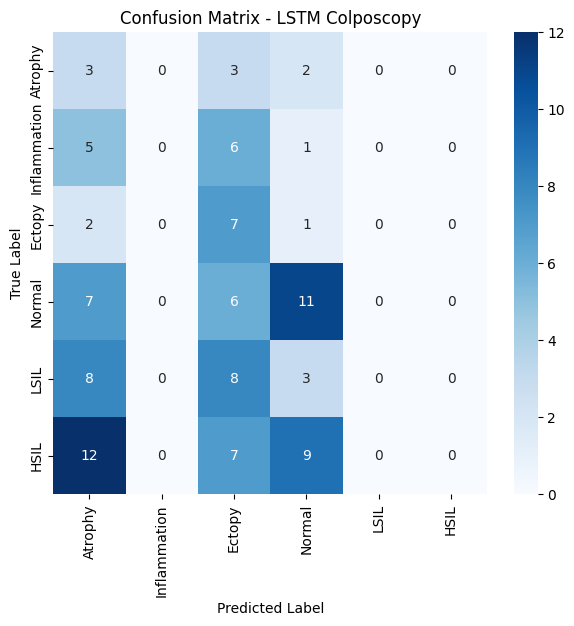

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(7,6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=["Atrophy","Inflammation","Ectopy","Normal","LSIL","HSIL"],
    yticklabels=["Atrophy","Inflammation","Ectopy","Normal","LSIL","HSIL"]
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - LSTM Colposcopy")
plt.show()

In [8]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred,
    target_names=[
        "Atrophy", "Inflammation", "Ectopy",
        "Normal", "LSIL", "HSIL"
    ]
))


              precision    recall  f1-score   support

     Atrophy       0.08      0.38      0.13         8
Inflammation       0.00      0.00      0.00        12
      Ectopy       0.19      0.70      0.30        10
      Normal       0.41      0.46      0.43        24
        LSIL       0.00      0.00      0.00        19
        HSIL       0.00      0.00      0.00        28

    accuracy                           0.21       101
   macro avg       0.11      0.26      0.14       101
weighted avg       0.12      0.21      0.14       101



C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif